In [1]:
import tqdm
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import svd


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
from numpy import count_nonzero

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

from scipy.sparse import csr_matrix
import implicit

In [3]:
data = pd.read_csv(r'C:/Users/sasha/Desktop/JUPYTER/Datasets/data.gzip.csv', compression='gzip')

In [4]:
data

,uid,item_id,dt
0,2126441,2741,2024-01-02
1,1481533,2742,2023-12-10
2,1166217,2742,2023-12-13
3,13398621,2742,2023-12-13
4,2029233,2745,2023-12-15
...,...,...,...
20561304,12187528,20564045,2024-01-14
20561305,12187528,20564045,2024-01-14
20561306,20985581,20564047,2023-12-06
20561307,20852780,20564048,2023-12-07


In [6]:
data.sample(n = 30)

,uid,item_id,dt
20094009,2221650,20096746,2023-12-17
2691449,18063511,2694184,2023-12-15
12476944,11245965,12479604,2023-11-24
10623197,7749546,10625938,2023-12-15
8452562,16393247,8455278,2024-01-04
3551557,6126575,3554172,2023-12-02
13100614,16525665,13103202,2023-11-27
11625305,9546678,11628046,2023-12-25
186850,4198679,189588,2024-01-03
2183030,9909369,2185767,2024-01-03


In [7]:
data['dt'] = pd.to_datetime(data['dt'])

In [9]:
%store data

Stored 'data' (DataFrame)


In [2]:
%store -r data

**КОЛ-ВО ДНЕЙ ИЗ КАЖДОГО МЕСЯЦА В ДАННЫХ**

In [322]:
days_in_11 = data[data['dt'].dt.month == 11]['dt'].nunique()
days_in_12 = data[data['dt'].dt.month == 12]['dt'].nunique()
days_in_1 = data[data['dt'].dt.month == 1]['dt'].nunique()

In [75]:
print(f'В датасете:\n дней из ноября - {days_in_11}\n дней из декабря - {days_in_12}\n дней из января - {days_in_1} ')

В датасете:
 дней из ноября - 16
 дней из декабря - 31
 дней из января - 14 


**СРЕДНЕЕ КОЛ_ВО ПОКУПОК ПО МЕСЯЦАМ**

In [61]:
avg_orders_11 = data[data['dt'].dt.month == 11].shape[0]/days_in_11                                  
avg_orders_12 = data[data['dt'].dt.month == 12].shape[0]/days_in_12
avg_orders_01 = data[data['dt'].dt.month == 1].shape[0]/days_in_1

In [76]:
print(f'Среднее кол-во покупок в день:\n в ноябре - {avg_orders_11}\n в декабре - {avg_orders_12}\n в январе - {avg_orders_01}')

Среднее кол-во покупок в день:
 в ноябре - 377850.06666666665
 в декабре - 364090.8
 в январе - 305448.76923076925


**КОПИЯ ДАТАФРЕЙМА ДЛЯ АНАЛИТИКИ**

In [18]:
data_analys = data.copy()

In [19]:
data_analys['Day'] = data_analys['dt'].dt.weekday
data_analys['Hour'] = data_analys['dt'].dt.hour
data_analys['Month']  = data_analys['dt'].dt.month

**КОЛ-ВО ЗАКАЗОВ ПО ДНЯМ НА КАЖДЫЙ МЕСЯЦ**

In [124]:
orders_per_day_month =  data_analys.groupby(['Month', 'Day']).size().reset_index(name='Count')


In [161]:
orders_per_day_month =  data_analys.groupby(['Month', 'Day']).size().reset_index(name='Count')
for index, row in tqdm(orders_per_day_month.iterrows()):
    denominator = (data[(data['dt'].dt.weekday == orders_per_day_month['Day'][index])
                           & (data['dt'].dt.month == orders_per_day_month['Month'][index])])['dt'].nunique()
    orders_per_day_month.at[index, 'Count'] /= denominator
    print(denominator)

0it [00:00, ?it/s]

2
2
2
2
2
2
2
2
2
3
3
2
2
2
4
4
4
4
5
5
5


In [162]:
orders_per_day_month

,Month,Day,Count
0,1,0,251402.500000
1,1,1,285802.500000
2,1,2,289831.000000
3,1,3,296808.500000
4,1,4,296110.000000
5,1,5,275126.000000
6,1,6,290336.500000
7,11,0,358063.500000
8,11,1,347920.000000
9,11,2,355474.666667


Text(42.21501388888889, 0.5, 'Amount of orders')

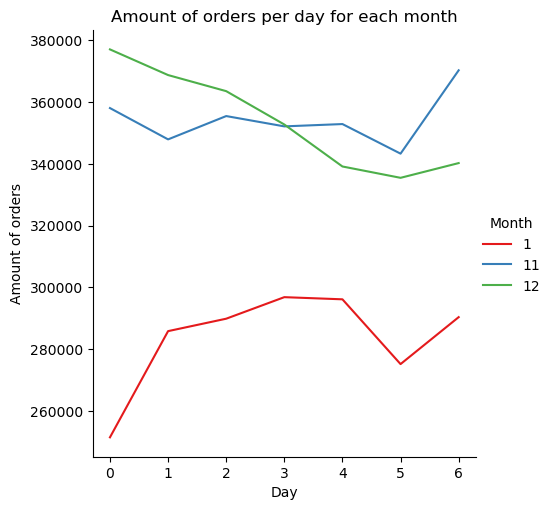

In [163]:
sns.relplot(data=orders_per_day_month, x= 'Day', y = 'Count', hue= 'Month', kind= 'line', palette='Set1')
plt.title('Amount of orders per day for each month')
plt.xlabel('Day')
plt.ylabel('Amount of orders')

**КОЛИЧЕСТВО ПОКУПОК ДЛЯ КАЖДОГО УНИКАЛЬНОГО ПОЛЬЗОВАТЕЛЯ**

In [324]:
orders_per_user = data.groupby('uid').size().reset_index(name = "Count").sort_values('Count', ascending= False)
orders_per_user
# orders_per_user[orders_per_user['Count'].isin([1,2])]

,uid,Count
757348,16132964,4666
265660,7626998,3730
29132,1829429,3147
939516,18574317,3081
820780,17031313,2760
...,...,...
483938,11869306,1
917530,18303586,1
483948,11869689,1
483954,11869847,1


Text(0, 0.5, 'People')

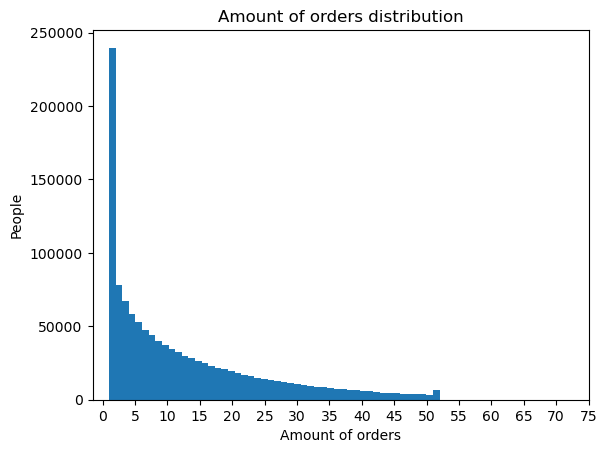

In [230]:
plt.hist((orders_per_user['Count'].loc[orders_per_user['Count'] < orders_per_user['Count'].quantile(0.95)]), bins= 50 )
plt.title('Amount of orders distribution')
plt.xticks(range(0, 80, 5))
plt.xlabel('Amount of orders')
plt.ylabel('People')

In [16]:
orders_per_user['Count'].loc[orders_per_user['Count'] < orders_per_user['Count'].quantile(0.99)].describe()

count    1.247858e+06
mean     1.509161e+01
std      1.617359e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.100000e+01
max      9.300000e+01
Name: Count, dtype: float64

**КОЛИЧЕСТВО ПОКУПОК КАЖДОГО УНИКАЛЬНОГО ТОВАРА**

In [169]:
orders_per_item = data.groupby('item_id').size().reset_index(name = 'Count').sort_values(by= 'Count', ascending= False)
orders_per_item

,item_id,Count
270516,2048560,11365
1077343,6506193,9937
580839,3938794,6422
422904,2969562,5323
3782019,18825647,4765
...,...,...
1941710,10732640,1
1941711,10732641,1
1941712,10732642,1
1941713,10732643,1


In [329]:
orders_per_item['Count'].describe()

count    4.346819e+06
mean     4.730197e+00
std      2.374453e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      1.136500e+04
Name: Count, dtype: float64

**ПРОБУЕМ РАБОТАТЬ С СЭМПЛАМИ ИЗ ДАТАФРЕЙМА**

In [56]:
model_data = data.copy()
model_data.drop(columns = ['dt'], inplace= True)
model_data['rating'] = 1

# data_sample = model_data.sample(n = 20000000, random_state = 42)
data_sample = model_data

In [57]:
person_u = list(np.sort(data_sample.uid.unique()))
thing_u = list(np.sort(data_sample.item_id.unique()))
values = data_sample['rating'].tolist()

row = data_sample.uid.astype('category').cat.set_categories(person_u).cat.codes
col = data_sample.item_id.astype('category').cat.set_categories(thing_u).cat.codes
sparse_matrix = csr_matrix((values, (row, col)), shape=(len(person_u), len(thing_u)))


In [58]:
model = implicit.als.AlternatingLeastSquares(factors=128, regularization=0.001, iterations= 40, calculate_training_loss= True)
model.fit(sparse_matrix)

  0%|          | 0/40 [00:00<?, ?it/s]

In [59]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

In [27]:
sorted_uid = sorted(data_sample.uid.unique())
sorted_item = sorted(data_sample.item_id.unique())

In [55]:
n_rec = 10
uid_for_rec = 18022362
recomendation = model.recommend(sorted_uid.index(uid_for_rec), sparse_matrix, N=n_rec, filter_already_liked_items=False)
rec_array_array = []
similarity_array = []
for i in range(n_rec):
    rec_array.append(sorted_item[recomendation[0][i]])
    similarity_array.append(recomendation[1][i])
rec_array, similarity_array

([12376289,
  2009721,
  1384655,
  5011655,
  1043297,
  5376098,
  18197358,
  5971565,
  65258,
  3089034,
  12376289,
  2009721,
  1384655,
  5011655,
  1043297,
  5376098,
  18197358,
  5971565,
  65258,
  3089034],
 [0.0022155186,
  0.0022031465,
  0.0020398684,
  0.0018484985,
  0.0013530329,
  0.001264815,
  0.0012459073,
  0.0012456912,
  0.0012314584,
  0.0012056263])

**Функция для подсчета ошибки между матрицами**

In [297]:
def RMSE(X_true: np.ndarray, X_predict: np.ndarray):
    error = ((X_true - X_predict)**2).sum()
    return np.sqrt(error/X_true.size)

**

In [302]:
class CustomALS(object):
    
    
    def __init__(self, k=10, n_iter=20, lambda_u=0.001,
                 lambda_v=0.001):
        
        self.k = k
        self.n_iter = 20
        self.lambda_u = lambda_u
        self.lambda_v = lambda_v
                                   
    def fit(self, R):
        self.R = R.copy()
                    
        m, n = R.shape
  
        self.U = np.random.normal(loc=0., scale=0.01, size=(m, self.k))
        self.V = np.random.normal(loc=0., scale=0.01, size=(n, self.k))
        
        R_T = self.R.T
        
        model_u = Ridge(alpha=self.lambda_u,
                        fit_intercept=True)
        
        model_v = Ridge(alpha=self.lambda_v,
                        fit_intercept=True)
        
        for _ in tqdm(range(self.n_iter)):

            for i in range(m):
                model_u.fit(X=self.V,
                            y=R_T[:,i])       
                self.U[i,:] = model_u.coef_
                
            for j in range(n):
                model_v.fit(X=self.U,
                            y=R_T[j,:])        
                self.V[j,:] = model_v.coef_

        self.R_hat = self.U.dot(self.V.T)
        

In [303]:
als = CustomALS()

In [304]:
als.fit(user_item.values)

  0%|          | 0/20 [00:00<?, ?it/s]

In [306]:
pd.DataFrame(als.R)

,0,1,2,3,4,5,6,7,8,9,...,9759,9760,9761,9762,9763,9764,9765,9766,9767,9768
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
pd.DataFrame(als.R_hat)

,0,1,2,3,4,5,6,7,8,9,...,9759,9760,9761,9762,9763,9764,9765,9766,9767,9768
0,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,2.400814e-08,9.602784e-09,...,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09
1,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,2.400814e-08,9.602784e-09,...,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09
2,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,2.400814e-08,9.602784e-09,...,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09
3,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,2.400814e-08,9.602784e-09,...,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09
4,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,2.400814e-08,9.602784e-09,...,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9898,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,2.400814e-08,9.602784e-09,...,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09
9899,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,2.400814e-08,9.602784e-09,...,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09
9900,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,2.400814e-08,9.602784e-09,...,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09
9901,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,2.400814e-08,9.602784e-09,...,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09,9.602784e-09


**RMSE ДЛЯ САМОПИСНОЙ ALS (CUSTOM_ALS)**

In [308]:
RMSE(als.R, als.R_hat)


0.010163412248635251

**ПРОБУЕМ ALS ИЗ IMPLICIT**

In [119]:
model = implicit.als.AlternatingLeastSquares(factors=128, regularization=0.001, iterations= 20, calculate_training_loss= True)
model.fit(sparse_matrix)

C:\Users\sasha\anaconda3\lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: Intel MKL BLAS is configured to use 6 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'MKL_NUM_THREADS=1' or by callng 'threadpoolctl.threadpool_limits(1, "blas")'. Having MKL use a threadpool can lead to severe performance issues
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

**RMSE ДЛЯ ALS ИЗ IMPLICIT**

In [312]:
model_R_hat = np.matmul(model.user_factors, model.item_factors.T)
RMSE(user_item.values, model_R_hat)

0.01001182516164847

In [137]:
model.recommend(1, sparse_matrix[1], N=10, filter_already_liked_items=True)

(array([1949568,  121204,  237927,  112482,   19172, 1149516,  149095,
        1138858,  544956, 1381762]),
 array([0.00158846, 0.00135676, 0.00129203, 0.00127846, 0.00125757,
        0.00121277, 0.00112967, 0.00110037, 0.00102908, 0.00102473],
       dtype=float32))

In [314]:
model.recommend_all(sparse_user_item).shape

(9903, 10)